<a href="https://colab.research.google.com/github/yusufdogu/BANKA_UYGULAMASI/blob/main/data_cleaning_and_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

Used pd.set_option to view dataframe better

In [70]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option("display.max_colwidth",None)

With this cell you can more easily analyze the dataframe. It includes only english and specific country

In [ ]:
"""df=pd.read_csv("/content/drive/MyDrive/DataKind_dataset.csv")

df_eng=df[(df['question_language']=='eng')&(df['response_language']=='eng')]

df_eng_ke=df_eng[df_eng['response_user_country_code']=='ke']
df_eng_gb=df_eng[df_eng['response_user_country_code']=='gb']
df_eng_tz=df_eng[df_eng['response_user_country_code']=='tz']
df_eng_ug=df_eng[df_eng['response_user_country_code']=='ug']


df_eng_ke.to_csv('datakind_eng_ke.csv')
df_eng_gb.to_csv('datakind_eng_gb.csv')
df_eng_tz.to_csv('datakind_eng_tz.csv')
df_eng_ug.to_csv('datakind_eng_ug.csv')"""


We load our country dataframes

In [90]:
df_eng_ke = pd.read_csv("/content/drive/MyDrive/datakind/datakind_eng_kenya.csv",nrows=1000)
df_eng_gb = pd.read_csv("/content/drive/MyDrive/datakind/datakind_eng_gb.csv",nrows=1000)
df_eng_tz = pd.read_csv("/content/drive/MyDrive/datakind/datakind_eng_tz.csv",nrows=1000)
df_eng_ug = pd.read_csv("/content/drive/MyDrive/datakind/datakind_eng_uganda.csv",nrows=1000)

In [91]:
df_eng_dict={
    "Kenya":df_eng_ke,
    "Tanzania":df_eng_tz,
    "Uganda":df_eng_ug,
    "GB":df_eng_gb,
}

In [83]:
from tabulate import tabulate

In [92]:
def first_look(df_name,df):
  print("\n" + "="*200)
  print(f"🟢 DATASET UNDER ANALYSIS : {df_name} 🟢".center(200))
  print("="*200 + "\n")

  print("🔹 DATA DIMENSIONS")
  print(f"   ROWS: {df.shape[0]}  |  COLUMNS: {df.shape[1]}")
  print("-"*100)
  print("\n🔹 VARIABLE (COLUMN) TYPES")
  print(tabulate(pd.DataFrame(df.dtypes, columns=["DATA TYPES"]), headers="keys", tablefmt="pretty"))
  print("-"*100)

  print("\n🔹 RANDOM SAMPLE 5 ROWS TRANSPOSED VIEW (FOR BETTER READABILITY) \n")
  df_transposed = df.head().T
  for col in df_transposed.columns:
    print(f"\nROW {col}:\n")
    print(df_transposed[col].to_string(index=True))
  print("-"*100)

  print("\n🔹 MISSING VALUES")
  missing_values = df.isnull().sum()
  if missing_values.sum() == 0:
      print("✅ NO MISSING VALUES FOUND")
  else:
      print(tabulate(pd.DataFrame(missing_values[missing_values > 0], columns=["MISSING VALUE COUNT"]), headers="keys", tablefmt="fancy_grid"))
  print("-"*100)

  print("\n🔹 UNIQUE VALUE COUNT")
  print(tabulate(pd.DataFrame(df.nunique(), columns=["UNIQUE VALUES"]), headers="keys", tablefmt="psql"))
  print("-"*100)

  print("\n🔹 DATA STATISTICS")
  print(tabulate(df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T, headers="keys", tablefmt="fancy_grid"))
  print("="*100 + "\n")


In [93]:
for key,val in df_eng_dict.items():
  first_look(key,val)


                                                                                   🟢 DATASET UNDER ANALYSIS : Kenya 🟢                                                                                   

🔹 DATA DIMENSIONS
   ROWS: 1000  |  COLUMNS: 24
----------------------------------------------------------------------------------------------------

🔹 VARIABLE (COLUMN) TYPES
+----------------------------+------------+
|                            | DATA TYPES |
+----------------------------+------------+
|        question_id         |   int64    |
|      question_user_id      |   int64    |
|     question_language      |   object   |
|      question_content      |   object   |
|       question_topic       |   object   |
|       question_sent        |   object   |
|        response_id         |   int64    |
|      response_user_id      |   int64    |
|     response_language      |   object   |
|      response_content      |   object   |
|       response_topic       |   object   |
|    

In [155]:
import matplotlib.pyplot as plt
import numpy as np

In [158]:
def detailed_missing_value_analysis(df_name,df):
  print("\n" + "="*200)
  print(f"🟢 DATASET UNDER ANALYSIS : {df_name} 🟢".center(200))
  print("="*200 + "\n")

  print("🔹 DATA DIMENSIONS")
  print(f"   ROWS: {df.shape[0]}  |  COLUMNS: {df.shape[1]}")
  print("-"*100)

  missing_df=df[df.columns[df.isnull().sum()>0]].isnull().sum()

  print("Missing values table")
  print(missing_df)

  fig = plt.figure(figsize=(10, 7))

  def func(pct, allvalues):
      absolute = int(pct / 100.*np.sum(allvalues))
      return "{:.1f}%\n({:d})".format(pct, absolute)

  plt.title(f'Total missing values = {missing_df.sum()}')
  plt.pie(missing_df,
          autopct=lambda pct: func(pct,missing_df),
          labels=missing_df.index)

  # show plot
  plt.show()





                                                                                   🟢 DATASET UNDER ANALYSIS : Kenya 🟢                                                                                   

🔹 DATA DIMENSIONS
   ROWS: 1000  |  COLUMNS: 24
----------------------------------------------------------------------------------------------------
Missing values table
question_topic           28
response_topic          636
question_user_gender    864
question_user_dob       836
response_user_gender    738
response_user_dob       664
dtype: int64


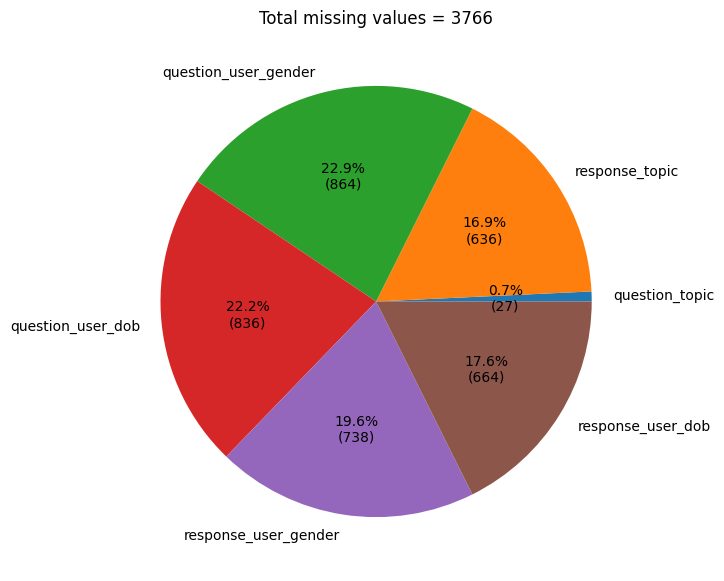


                                                                                 🟢 DATASET UNDER ANALYSIS : Tanzania 🟢                                                                                  

🔹 DATA DIMENSIONS
   ROWS: 5  |  COLUMNS: 24
----------------------------------------------------------------------------------------------------
Missing values table
question_topic          1
response_topic          3
question_user_gender    5
question_user_dob       5
response_user_gender    5
response_user_dob       5
dtype: int64


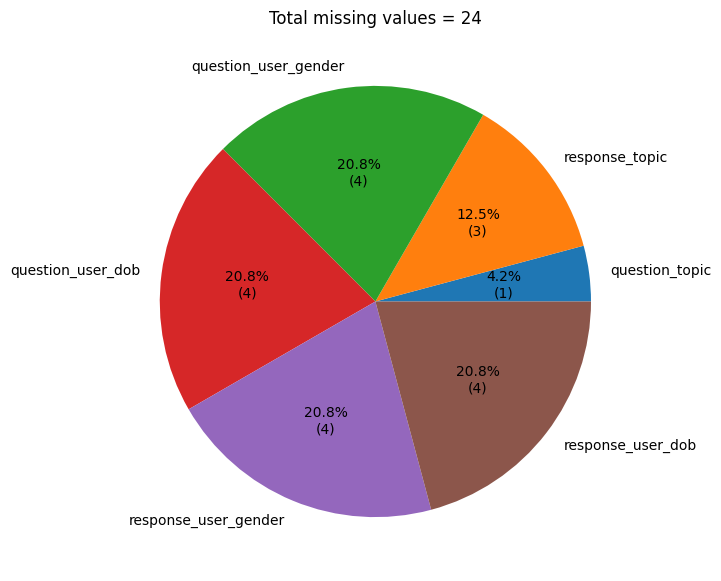


                                                                                  🟢 DATASET UNDER ANALYSIS : Uganda 🟢                                                                                   

🔹 DATA DIMENSIONS
   ROWS: 1000  |  COLUMNS: 24
----------------------------------------------------------------------------------------------------
Missing values table
question_topic           58
response_topic          631
question_user_gender    938
question_user_dob       921
response_user_gender    805
response_user_dob       759
dtype: int64


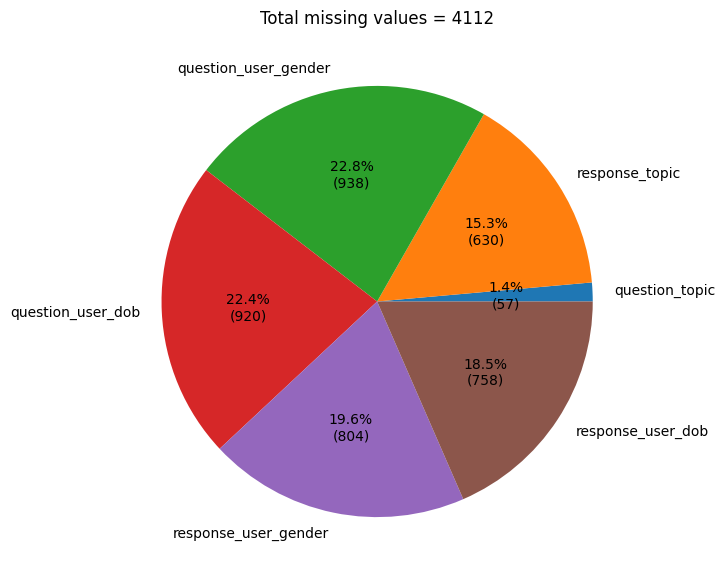


                                                                                    🟢 DATASET UNDER ANALYSIS : GB 🟢                                                                                     

🔹 DATA DIMENSIONS
   ROWS: 277  |  COLUMNS: 24
----------------------------------------------------------------------------------------------------
Missing values table
question_topic          106
response_topic          154
question_user_gender    265
question_user_dob       265
response_user_gender    268
response_user_dob       265
dtype: int64


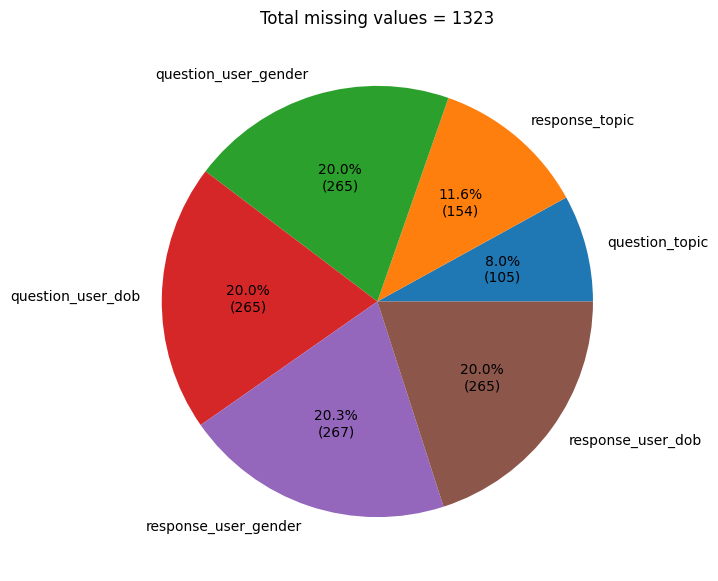

In [159]:
for key,val in df_eng_dict.items():
  detailed_missing_value_analysis(key,val)

In [187]:
def finding_unnecessary_cols(df_name,df):
  print("\n" + "="*200)
  print(f"🟢 DATASET UNDER ANALYSIS : {df_name} 🟢".center(200))
  print("="*200 + "\n")

  unnecessary_cols=[]
  for col in df.columns:
    if df[col].nunique() <= 1:
      unnecessary_cols.append(col)

  print(f"Columns to drop: {unnecessary_cols}")

  print("🔹 DATA DIMENSIONS BEFORE DROPPING")
  print(f"   ROWS: {df.shape[0]}  |  COLUMNS: {df.shape[1]}")
  print("-"*100)


  df.drop(columns=unnecessary_cols,inplace=True)

  print("🔹 DATA DIMENSIONS AFTER DROPPING")
  print(f"   ROWS: {df.shape[0]}  |  COLUMNS: {df.shape[1]}")
  print("-"*100)

  print("Before filling NaN values (Some values are float even they are NaN)")
  print("-"*100)
  for i,row in df.head().iterrows():
    print(row['response_topic'])
    print(type(row['response_topic']))

  print("-"*100)

  df.fillna("NaN",inplace=True) #this one will work too if we use this row then we dont have to return anything

  print("After filling NaN values")
  print("-"*100)
  for i,row in df.head().iterrows():
    print(row['response_topic'])
    print(type(row['response_topic']))



In [188]:
for key,val in df_eng_dict.items():
  finding_unnecessary_cols(key,val)


                                                                                   🟢 DATASET UNDER ANALYSIS : Kenya 🟢                                                                                   

Columns to drop: []
🔹 DATA DIMENSIONS BEFORE DROPPING
   ROWS: 1000  |  COLUMNS: 18
----------------------------------------------------------------------------------------------------
🔹 DATA DIMENSIONS AFTER DROPPING
   ROWS: 1000  |  COLUMNS: 18
----------------------------------------------------------------------------------------------------
Before filling NaN values (Some values are float even they are NaN)
----------------------------------------------------------------------------------------------------
NaN
<class 'str'>
NaN
<class 'str'>
cereal
<class 'str'>
NaN
<class 'str'>
NaN
<class 'str'>
----------------------------------------------------------------------------------------------------
After filling NaN values
------------------------------------------------------------

from the above analysis we can understand that some of the columns of dfs has 1 or 0 unique value which means they won't give any value to our analysis

In [193]:
def making_rows_unique(df_name,df):
  print("\n" + "="*200)
  print(f"🟢 DATASET UNDER ANALYSIS : {df_name} 🟢".center(200))
  print("="*200 + "\n")

  print(f"Before making rows unique Data has {df.shape[0]} rows")
  print(f"Before making rows unique Data has {df['response_id'].nunique()} unique response id")
  print()

  idx_to_drop=[]

  for idx, value in df['response_id'].items():

    if idx not in idx_to_drop:

      repeated_rows = df[df['response_id']==value] #keeps the old indexes

      if repeated_rows.shape[0]>1:
        question_topic_list=''
        response_topic_list=''

        for i,row in repeated_rows.iterrows():
          question_topic_list=question_topic_list+df.iloc[i,3]+','
          response_topic_list=response_topic_list+df.iloc[i,8]+','


        for i,row in repeated_rows.iterrows():
          if i==repeated_rows.index[0]:
            df.loc[df.index[i], "question_topic"] = question_topic_list
            df.loc[df.index[i], "response_topic"] = response_topic_list

          else:
            if i not in idx_to_drop:
              idx_to_drop.append(i)

  df.drop(index=idx_to_drop,inplace=True)

  print(f"After making rows unique Data has {df.shape[0]} rows")
  print(f"After making rows unique Data has {df['response_id'].nunique()} unique response id")
  print()

In [194]:
for key,val in df_eng_dict.items():
  making_rows_unique(key,val)


                                                                                   🟢 DATASET UNDER ANALYSIS : Kenya 🟢                                                                                   

Before making rows unique Data has 1000 rows
Before making rows unique Data has 714 unique response id

Before making rows unique Data has 714 rows
Before making rows unique Data has 714 unique response id


                                                                                 🟢 DATASET UNDER ANALYSIS : Tanzania 🟢                                                                                  

Before making rows unique Data has 5 rows
Before making rows unique Data has 5 unique response id

Before making rows unique Data has 5 rows
Before making rows unique Data has 5 unique response id


                                                                                  🟢 DATASET UNDER ANALYSIS : Uganda 🟢                                                                       

In [205]:
df_eng_ke.head()

,question_id,question_user_id,question_content,question_topic,question_sent,response_id,response_user_id,response_content,response_topic,response_sent,question_user_status,question_user_gender,question_user_dob,question_user_created_at,response_user_status,response_user_gender,response_user_dob,response_user_created_at
0,3849084,6642,Q-i have stock rabbit's urine for 5 weeks mashambani store at kericho town watakubali kununua?1litre it is how many shiling?,rabbit,2017-11-22 12:25:10+00,3852272,35690,Q165#Ksh120,NaN,2017-11-22 15:26:07+00,destroyed,NaN,NaN,2015-07-28 17:12:04+00,zombie,NaN,NaN,2015-11-14 19:59:19+00
1,3849100,237506,WHERE DO I GET SEEDS OF COCONUT?,"pig,coconut,",2017-11-22 12:25:12+00,4263505,412335,"Q11:try kisumu ,migori ,homa bay,siaya and anywhere in nyanza they like pork meat alot.","NaN,NaN,",2017-12-22 18:40:28+00,destroyed,NaN,NaN,2017-06-27 10:45:20+00,destroyed,NaN,NaN,2017-10-03 17:35:12+00
2,3849100,237506,WHERE DO I GET SEEDS OF COCONUT?,"coconut,pig,",2017-11-22 12:25:12+00,3852604,412335,Q11:coast Cereals,"cereal,cereal,",2017-11-22 15:48:34+00,destroyed,NaN,NaN,2017-06-27 10:45:20+00,destroyed,NaN,NaN,2017-10-03 17:35:12+00
3,3849100,237506,WHERE DO I GET SEEDS OF COCONUT?,"pig,coconut,",2017-11-22 12:25:12+00,4238099,412335,"Q11:try kisumu ,migori ,homa bay,siaya and anywhere in nyanza they like pork meat alot.","NaN,NaN,",2017-12-21 17:34:59+00,destroyed,NaN,NaN,2017-06-27 10:45:20+00,destroyed,NaN,NaN,2017-10-03 17:35:12+00
7,3849129,54426,Q#.Which plant has omega3?,plant,2017-11-22 12:25:16+00,3849209,357443,q12 Cassavah,cassava,2017-11-22 12:28:03+00,zombie,male,1951-10-17,2016-01-28 13:03:36+00,destroyed,NaN,NaN,2017-09-14 17:00:52+00


In [211]:
def same_rows_except_date(df_name,df):
  idx_to_drop=[]
  comparison_mask=[False if col in ['response_id','response_sent'] else True for col in val.columns ]

  for idx, value in df['question_id'].items():
    answers_for_same_question = df[df['question_id']==value]

    if idx not in idx_to_drop:
      if answers_for_same_question.shape[0]>1:

        for i,row in answers_for_same_question.iterrows():

          for j,row_inn in answers_for_same_question.iloc[i:].iterrows():

            compare_cols= (row==row_inn).to_list()

            if compare_cols==comparison_mask:
              if j not in idx_to_drop:
                idx_to_drop.append(j)


  print(f"Before dropping repeated rows unique Data has {df.shape[0]} rows")
  print(f"Before dropping repeated rows unique Data has {df['response_id'].nunique()} unique response id")
  print()

  print(idx_to_drop)
  df.drop(index=idx_to_drop,inplace=True)

  print(f"After dropping repeated rows unique Data has {df.shape[0]} rows")
  print(f"After dropping repeated rows unique Data has {df['response_id'].nunique()} unique response id")
  print()

In [212]:
for key,val in df_eng_dict.items():
  same_rows_except_date(key,val)

Before dropping repeated rows unique Data has 714 rows
Before dropping repeated rows unique Data has 714 unique response id

[3]
After dropping repeated rows unique Data has 713 rows
After dropping repeated rows unique Data has 713 unique response id

Before dropping repeated rows unique Data has 5 rows
Before dropping repeated rows unique Data has 5 unique response id

[]
After dropping repeated rows unique Data has 5 rows
After dropping repeated rows unique Data has 5 unique response id

Before dropping repeated rows unique Data has 763 rows
Before dropping repeated rows unique Data has 763 unique response id

[]
After dropping repeated rows unique Data has 763 rows
After dropping repeated rows unique Data has 763 unique response id

Before dropping repeated rows unique Data has 218 rows
Before dropping repeated rows unique Data has 218 unique response id

[]
After dropping repeated rows unique Data has 218 rows
After dropping repeated rows unique Data has 218 unique response id



In [213]:
for key,val in df_eng_dict.items():
  first_look(key,val)


                                                                                   🟢 DATASET UNDER ANALYSIS : Kenya 🟢                                                                                   

🔹 DATA DIMENSIONS
   ROWS: 713  |  COLUMNS: 18
----------------------------------------------------------------------------------------------------

🔹 VARIABLE (COLUMN) TYPES
+--------------------------+------------+
|                          | DATA TYPES |
+--------------------------+------------+
|       question_id        |   int64    |
|     question_user_id     |   int64    |
|     question_content     |   object   |
|      question_topic      |   object   |
|      question_sent       |   object   |
|       response_id        |   int64    |
|     response_user_id     |   int64    |
|     response_content     |   object   |
|      response_topic      |   object   |
|      response_sent       |   object   |
|   question_user_status   |   object   |
|   question_user_gender   |   obj